In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

#class
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import PrecisionRecallDisplay

#score
from sklearn.metrics import precision_score, accuracy_score, roc_auc_score, confusion_matrix,f1_score, roc_curve, auc, recall_score

from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

from sklearn.datasets import make_classification

# from sklearn.metrics import plot_confusion_matrix -> Plot_Confusion_Matrix is deprecated
from sklearn.metrics import ConfusionMatrixDisplay

import tkinter
import matplotlib

#Read data

In [2]:
#Read data
df_agg = pd.read_csv("Sample Data/FS_ALL.csv")
df_agg.head()

,"Total debt service (% of exports of goods, services and primary income)",Short-term debt (% of total external debt),Real interest rate (%),Total reserves minus gold (in %),Trade (% of GDP),Imports of goods and services (current US$),Exports of goods and services (current US$),Current account balance (% of GDP),"Portfolio investment, net (BoP, current US$)","Foreign direct investment, net inflows (% of GDP)",...,Left Government (democ),Polity (polity),Durable (durable),Turnover (xconst),Legislative/Executive election (exrec),State fragility index (sfi),Years (poleff),Economic Effectiveness (ecoeff),Presist (presistance),Target
0,0.0,0.0,0.511705,1.000000,0.380783,0.002563,0.003350,0.453849,0.206589,0.038336,...,1.0,1.0,0.775862,1.0,1.0,0.166667,0.0,0.0,1.0,0
1,0.0,0.0,0.512088,0.848367,0.371018,0.003331,0.003961,0.461811,0.206589,0.038640,...,1.0,1.0,0.784483,1.0,1.0,0.166667,0.0,0.0,1.0,0
2,0.0,0.0,0.511337,0.664417,0.338931,0.004087,0.005054,0.469933,0.206589,0.048814,...,1.0,1.0,0.793103,1.0,1.0,0.166667,0.0,0.0,1.0,0
3,0.0,0.0,0.509767,0.472346,0.347603,0.006803,0.007776,0.476156,0.206589,0.073088,...,1.0,1.0,0.801724,1.0,1.0,0.166667,0.0,0.0,1.0,0
4,0.0,0.0,0.508391,0.404584,0.356862,0.008622,0.009476,0.483780,0.206589,0.043774,...,1.0,1.0,0.810345,1.0,1.0,0.166667,0.0,0.0,1.0,0


In [3]:
# Check for null values in each column
null_counts = df_agg.isnull().sum()
print(null_counts)

Total debt service (% of exports of goods, services and primary income)    0
Short-term debt (% of total external debt)                                 0
Real interest rate (%)                                                     0
Total reserves minus gold (in %)                                           0
Trade (% of GDP)                                                           0
Imports of goods and services (current US$)                                0
Exports of goods and services (current US$)                                0
Current account balance (% of GDP)                                         0
Portfolio investment, net (BoP, current US$)                               0
Foreign direct investment, net inflows (% of GDP)                          0
Real GDP (current US$)                                                     0
GDP growth (annual %)                                                      0
Inflation, consumer prices (annual %)                                      0

<Axes: >

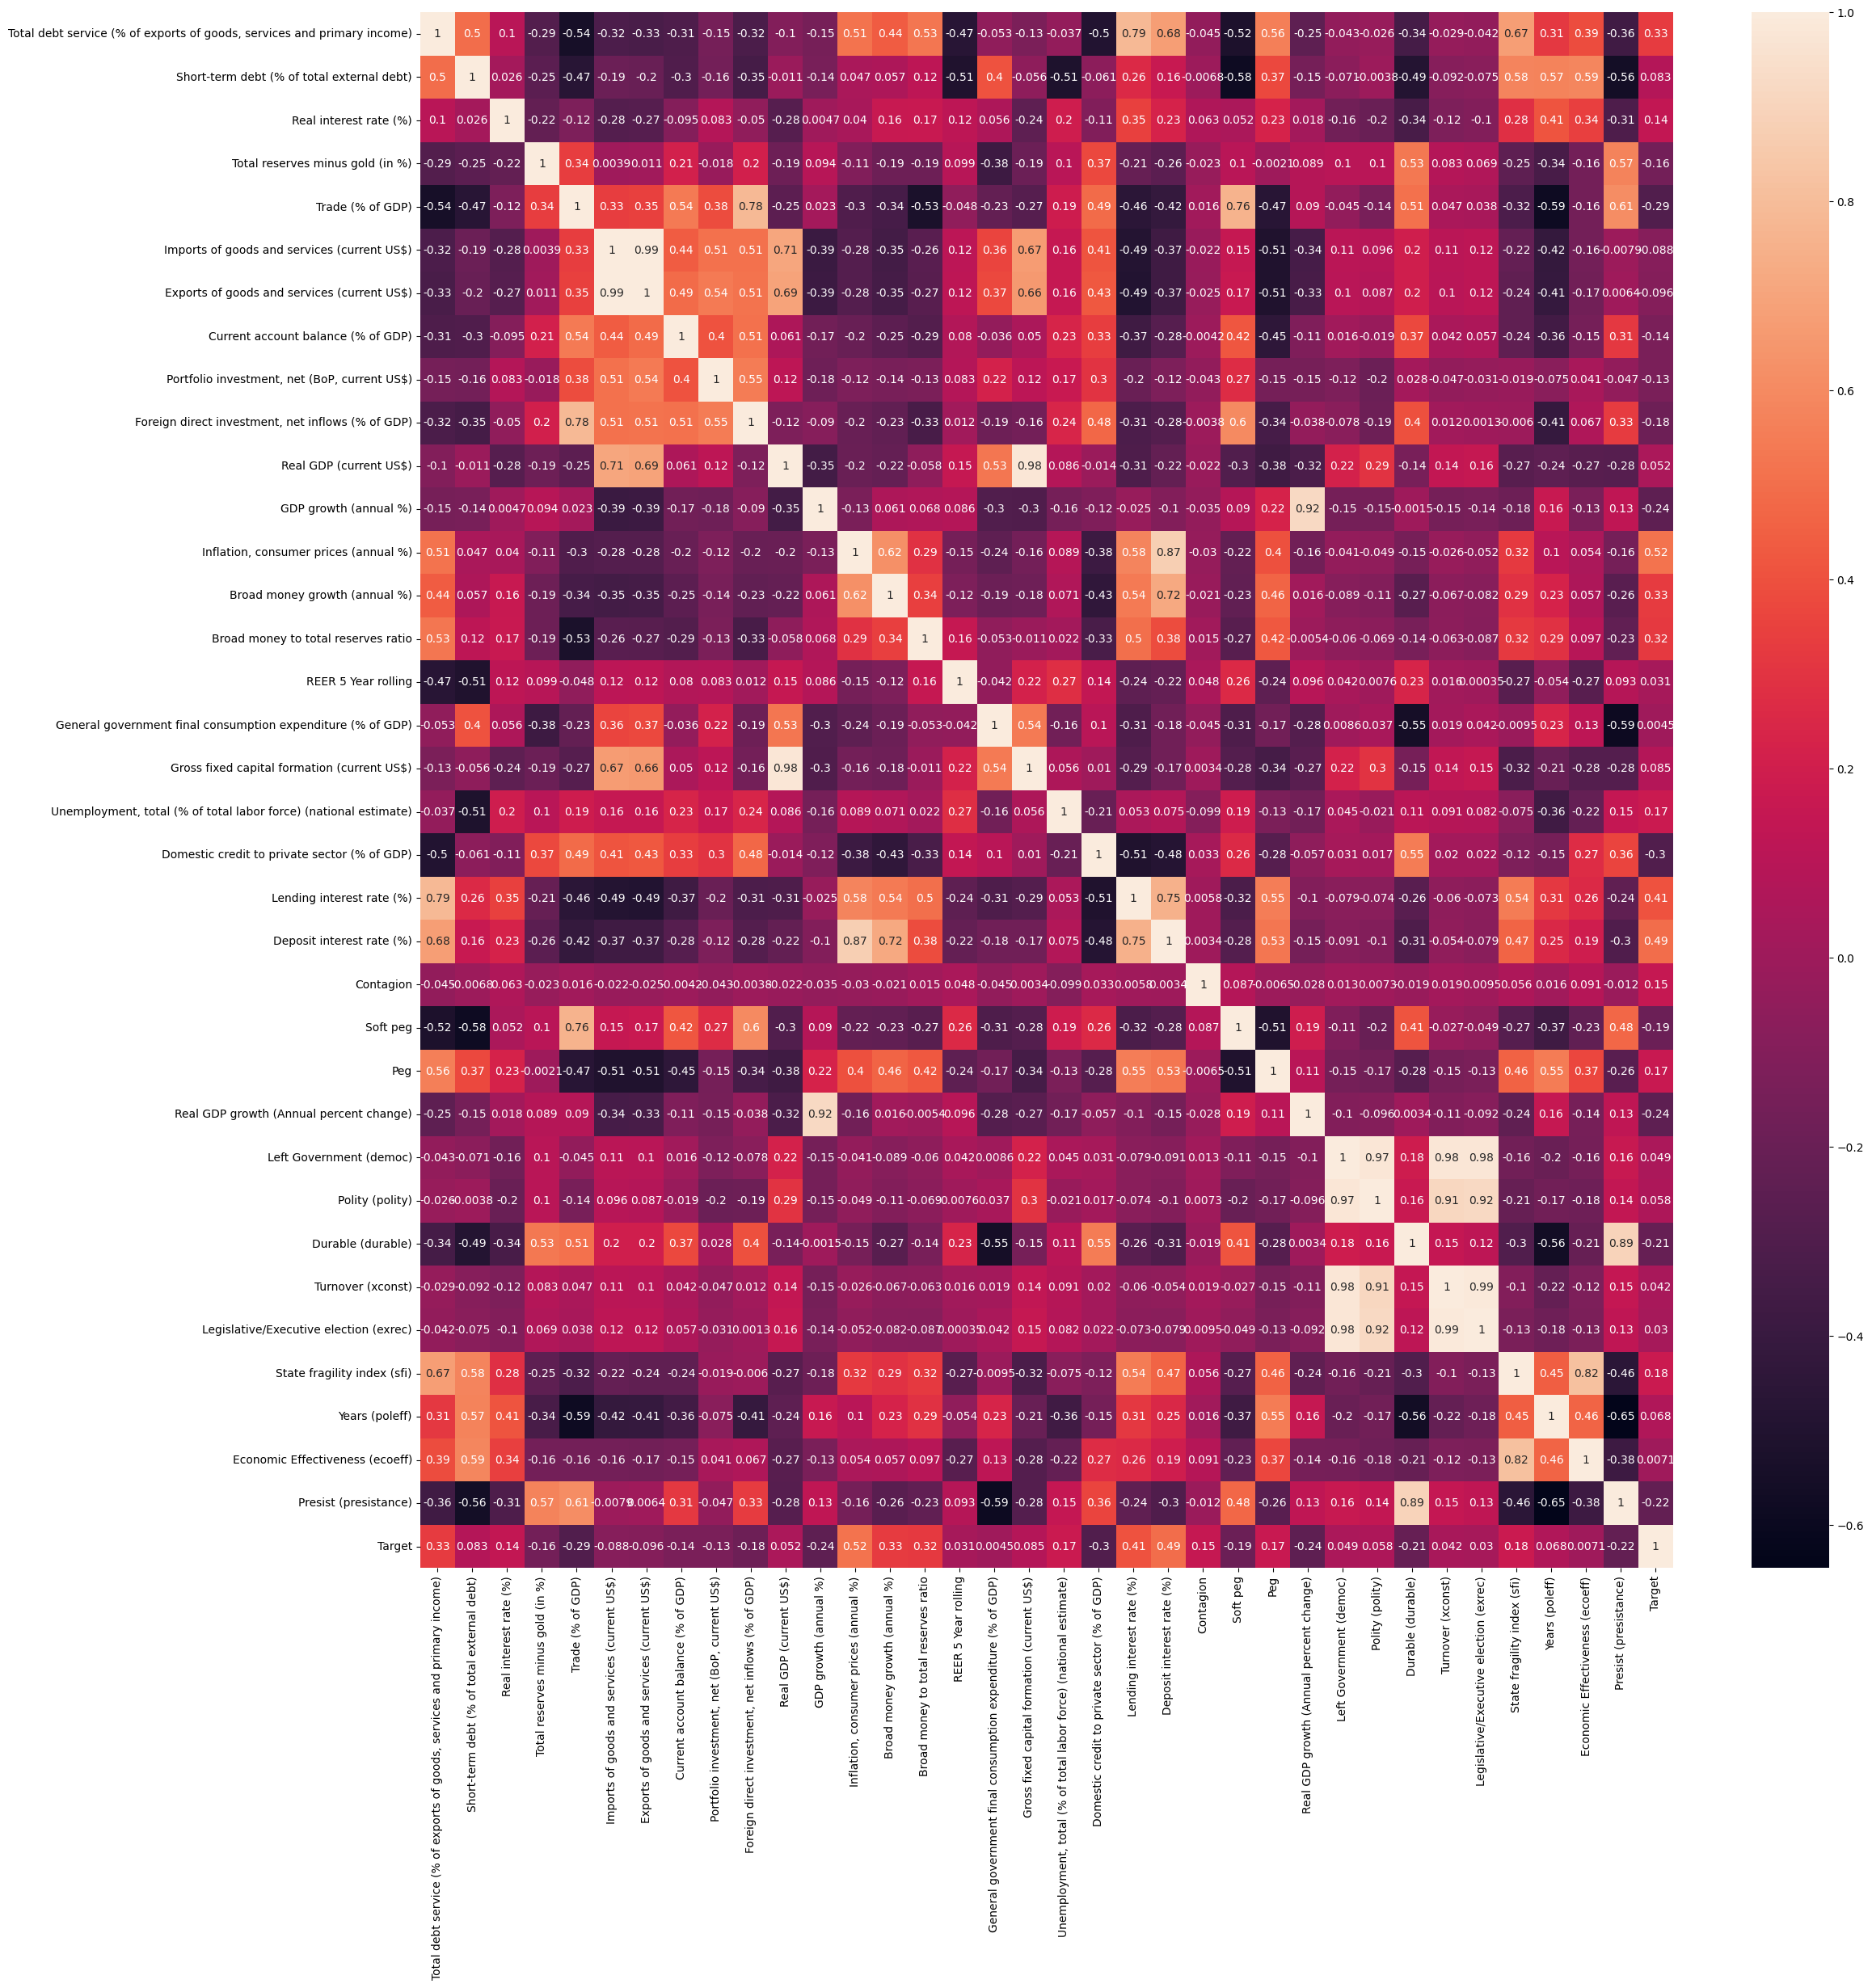

In [4]:
"""  
The logic behind using correlation for feature selection is that good variables correlate highly with the target. 
If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, 
the model only needs one, as the second does not add additional information. 
"""
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = df_agg.corr()

# Plotting the heat map
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot = True)

In [5]:
from sklearn import svm

# read data
X = df_agg.drop(columns=['Target','Short-term debt (% of total external debt)','Total debt service (% of exports of goods, services and primary income)'])
X = X.values
y = df_agg['Target'].values

# Split the data into testing and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [6]:
""" 
PCA (Principal Component Analysis) is not a feature selection mechanism, 
as it does not select features based on their relevance to the target variable. 
Instead, PCA is a dimensionality reduction technique that transforms a set of correlated 
variables into a smaller set of uncorrelated variables, called principal components (PCs)
"""

from sklearn.decomposition import PCA
pca = PCA()
columns_to_use = len(X_train[1])
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

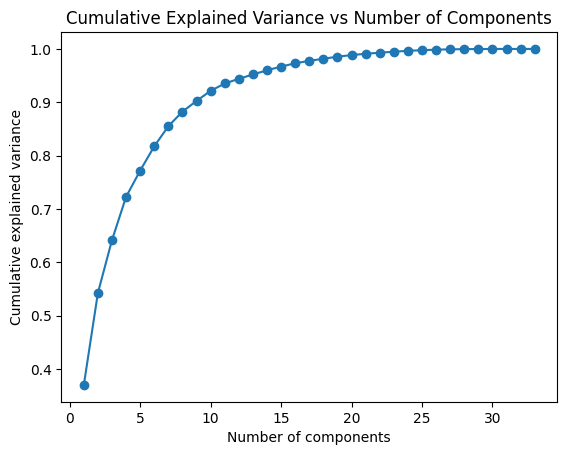

In [7]:
# Plot the cumulative explained variance vs the number of components
plt.plot(range(1, columns_to_use + 1), cumsum, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.show()

In [8]:
d = np.argmax(cumsum >= 0.95) + 1
"""  
The optimal number of principal components is reached when the cumulative variance stops growing fast:
We found that the number of dimensions can be reduced from 35 to 13 while preserving 95% of its variance. 
Hence, the compressed dataset is now 37% of its original size!
"""
# Create a PCA object with the desired number of components
pca = PCA(n_components=13)

# Fit the PCA object to the training data
pca.fit(X_train)

# Transform the training and testing data using the PCA object
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

GridSearch CV

In [9]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,5],
    'kernel': ['rbf','linear']
}, cv=5, scoring=['recall'],refit='recall',verbose=1)
clf.fit(X_test, y_test)
clf.cv_results_
y_pred = clf.predict(X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


Confusion Matrix:
 [[45  0]
 [ 5  2]]
Accuracy:         0.9038461538461539
Recall Score:     0.2857142857142857
Precision Score:  1.0
F1 Score:         0.4444444444444445
ROC_AUC Score:    0.6428571428571428


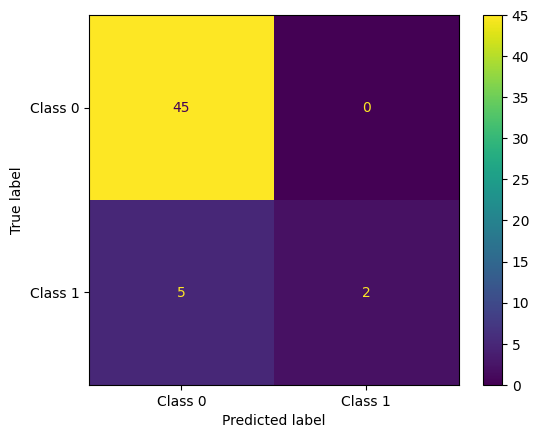

<Figure size 640x480 with 0 Axes>

In [10]:
# AFTER CV 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:        ", accuracy_score(y_test, y_pred))
print("Recall Score:    ", recall_score(y_test, y_pred, zero_division=1))     
print("Precision Score: ",precision_score(y_test, y_pred, zero_division=1))
print("F1 Score:        ", f1_score(y_test, y_pred,zero_division=1))
print("ROC_AUC Score:   ",roc_auc_score(y_test,y_pred,multi_class='ovr'))


cm = confusion_matrix(y_test, y_pred)
# Create an instance of the ConfusionMatrixDisplay class
cmd = ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1'])
# Call the plot() method of the ConfusionMatrixDisplay object to display the confusion matrix
cmd.plot()

# plot_confusion_matrix(clf, X_test, y_test)  
plt.show()
plt.savefig('svm-1.png')

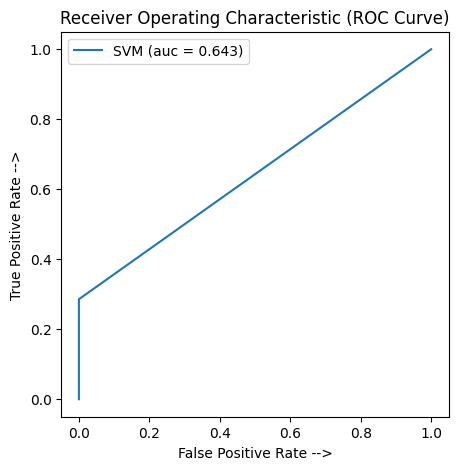

<Figure size 640x480 with 0 Axes>

In [11]:
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title("Receiver Operating Characteristic (ROC Curve)")
plt.legend()
plt.show()
plt.savefig('svm')


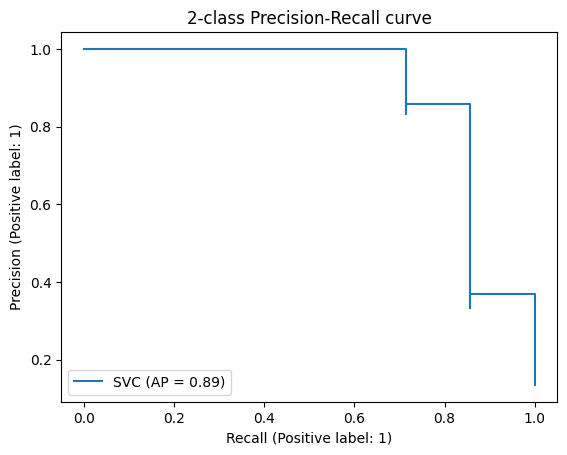

In [12]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="SVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")
display.figure_.savefig('svm-3.png')